In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import numpy as np
import pandas as pd
from DarkNews import plot_tools as pt

In [36]:
from scipy.optimize import dual_annealing
func = lambda x: np.random.rand()*x**2
ret = dual_annealing(func, bounds=[(0,10)])
ret.x[0]


4.891461068034796e-05

In [38]:
ret.fun

7.832601244338953e-11

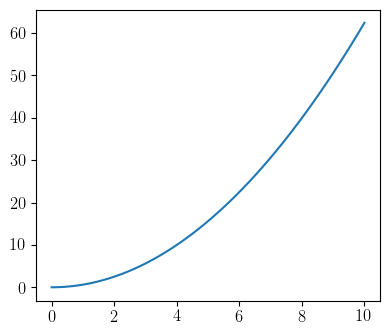

In [33]:
x = np.linspace(0,10)
plt.plot(x, func(x))

# 1. Set general parameters for fitting

### Path and Grid

In [8]:

# general features
save = False
extension = 'pdf'
leg_loc = 'upper left'

# data names and titles
path = f'../results/3p1_general_0.0008/5m_12d_13h_44m_30s_'
path_data = path+'chi2.dat'
plot_path = path +f'plots/test.' + extension

f = open(path_data, 'r')
header = f.readline().replace('# ', '').split()
data = pd.read_csv(f, sep='\s+', names=header, dtype=np.float)
data = data[data.chi2 >= 0]

plot_title = r'Best-fit regions for MiniBooNE $E_\nu^{\mathrm{CCQE}}$'
ylabel = r'$\Delta \ / $ GeV'
xlabel = r'$m_{5} \ / $ GeV'
    
# load data for each parameter
X = data['mzprime'].values
Y = data['m4'].values

kwarg_data = path+'input_kwargs.npy'
kwargs = np.load(kwarg_data, allow_pickle=True).item()
kwargs

/tmp/ipykernel_34934/3977952514.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = pd.read_csv(f, sep='\s+', names=header, dtype=np.float)


{'Umu4': 1e-06,
 'UD4': 0.7071067811865475,
 'gD': 2.0,
 'epsilon': 0.0008,
 'neval': 100000,
 'HNLtype': 'dirac',
 'pandas': False,
 'parquet': False,
 'loglevel': 'ERROR'}

/tmp/ipykernel_34934/87406050.py:22: UserWarning: The following kwargs were not used by contour: 'labels'
  CS = ax.tricontourf(X,Y,Z,levels=levels,cmap='Blues_r', labels=['a','b','c'])


(0.01, 1.0)

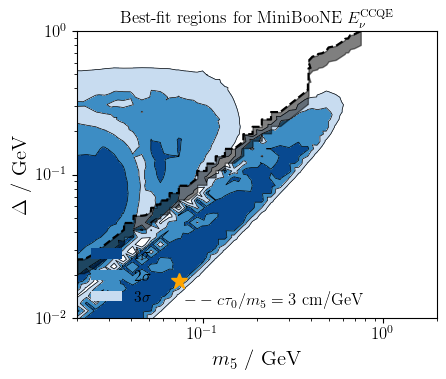

In [9]:

# line divisions for other possible channels
Y_1 = np.ones(len(Y))
Y_2 = 2 * Y_1
X_0 = np.linspace(X.min(),X.max(),500)
Y_1 = np.ones(len(X_0))
Y_2 = 2 * Y_1

# What to plot
Z = data['chi2'].values
Z -= Z.min()
dec = data['decay_length'].values / data['m4'].values

# Minimum
marker = '*'
mask = Z == Z.min()
xmin_enu, ymin_enu = X[mask][0],Y[mask][0]

# Plot
fig, ax = pt.std_fig()
levels = [0, 2.3, 6.18, 11.83]
level_dif = [1.25]
CS = ax.tricontourf(X,Y,Z,levels=levels,cmap='Blues_r', labels=['a','b','c'])
ax.tricontour(X,Y,Z,levels=levels,colors='black',linewidths=0.5)
proxy = [plt.Rectangle((0,0),1,1, fc=pc.get_facecolor()[0]) for pc in CS.collections]

cs = ax.tricontour(X,Y,dec,levels=[3.],colors='black',linewidths=1.5,linestyles='dashed')
xline, yline = cs.collections[0].get_paths()[0].vertices.T
ax.fill_between(xline,0.8*yline,yline,color="black",alpha=0.5)

# Plot minimum and regimes
ax.plot(xmin_enu, ymin_enu, color='orange', marker=marker, markersize=12)
ax.annotate(r'$--c \tau_0 / m_5 = 3$ cm/GeV', xy=(0.3,0.05), xycoords='axes fraction', color='black', fontsize=12)

ax.legend(proxy, [fr'${i} \sigma$' for i in range(1,4)], fontsize=11, loc='lower left')
ax.set_title(plot_title,fontsize=12)
ax.set_xlabel(xlabel,fontsize=15)
ax.set_ylabel(ylabel,fontsize=15)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(X.min(),X.max())
ax.set_ylim(Y.min(),Y.max())
# plt.scatter(X,Y, c='red', marker='+')

# if save:
    # plt.savefig(plot_path, dpi=400, bbox_inches='tight')
    # plt.show()
# else:
    # plt.show()
# plt.clf()

In [50]:
from filelock import FileLock

filename = "test.txt"
lock = FileLock(filename + ".lock")

lock.acquire()
try:
    with open(filename, "a") as f:
        f.write("General Kenobi!")
finally:
    lock.release()


In [63]:
df_1

NameError: name 'df_1' is not defined

In [43]:
np.genfromtxt("../results/3p1_general_eps_1e-2/5m_8d_19h_12m_28s_chi2_fit_3p1.dat",names=True,comments="#")

array([(0.02      , 0.01      , 1.29103344e-02, 2.00003545e-04, 2.82847720e-04, 0.01, 2.00003541e-04,  5.43321875, 1.71739686e+06, 5.16431680e+02, 0.01019724),
       (0.02      , 0.01166   , 8.90741892e-03, 1.00012297e-04, 1.41438746e-04, 0.01, 1.00012297e-04, 22.40075361, 2.94828879e+06, 8.90960979e+01, 0.01008599),
       (0.02      , 0.01359   , 2.45573152e-02, 1.00000001e-04, 1.41421356e-04, 0.01, 1.00000000e-04, 12.0775326 , 1.22642598e+06, 2.45573155e+02, 0.01037216),
       (0.02      , 0.01585   , 6.02286640e-02, 8.99999681e-05, 1.27279175e-04, 0.01, 8.99999677e-05,  5.77776243, 5.86957126e+05, 4.87851832e+02, 0.01037477),
       (0.02      , 0.01848   , 1.33808109e-01, 6.99659620e-05, 9.89468121e-05, 0.01, 6.99659618e-05,  6.95473621, 3.18225751e+05, 6.55022250e+02, 0.01023319),
       (0.02      , 0.02154   , 2.91317377e+01, 3.99889658e-06, 5.65529378e-06, 0.01, 3.99889658e-06, 10.19999557, 9.58720942e+01, 4.65850682e+02, 0.15370803),
       (0.02      , 0.02512   , 2.205497

In [20]:
_, pi0data = np.genfromtxt(open_text("fastbnb.include.pi0_tools","MB_numode_pi0_data.dat"), unpack = True)

bin_edges = np.linspace(0.100,1.250, 23+1, endpoint=True)


for b in bin_edges:
    print(round(b,5))

NameError: name 'open_text' is not defined

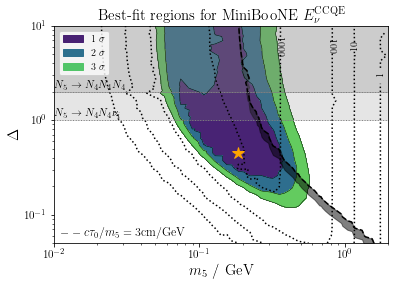

<Figure size 432x288 with 0 Axes>

In [36]:
# general features
save = True
extension = 'jpg'
leg_loc = 'upper left'

# data names and titles
path_data = path+'chi2_fit_3p2_muB.dat'
plot_path = path +f'plots/fit_3p2_general_mzprime_{mzprime}_muB.' + extension
data = pd.read_csv(path_data,sep='\t')

data = data[data.chi2 >= 0]

plot_title = r'Best-fit regions for MiniBooNE $E_\nu^{\mathrm{CCQE}}$'
xlabel = r'$m_5 \ / $ GeV'
ylabel = r'$\Delta$'
    
# load data for each parameter
X = data['m5'].values
Y = data['delta'].values

# line divisions for other possible channels
Y_1 = np.ones(len(Y))
Y_2 = 2 * Y_1
X_0 = np.linspace(X.min(),X.max(),500)
Y_1 = np.ones(len(X_0))
Y_2 = 2 * Y_1

# What to plot
Z = data['chi2'].values
Z -= Z.min()
dec = data['decay_length'].values / data['m5'].values

# Minimum
marker = '*'
mask = Z == Z.min()
xmin_enu, ymin_enu = X[mask][0],Y[mask][0]

# Number of events at MicroBooNE
W = data['n_muB'].values

# Colors
num_colors = 12
viridis = cm.get_cmap('viridis', num_colors)
bar_1 = mpatches.Patch(color=viridis(range(num_colors))[1], label=r'1 $\sigma$')
bar_2 = mpatches.Patch(color=viridis(range(num_colors))[4], label=r'2 $\sigma$')
bar_3 = mpatches.Patch(color=viridis(range(num_colors))[8], label=r'3 $\sigma$')
bar_4 = mpatches.Patch(color="gray", label=r'$c \tau_0 / m_5 = 1 \mathrm{cm / GeV}$')

# Plot
plt.rcParams["figure.figsize"] = (6,4)
levels = [0,2.3,6.18,11.83]
level_dif = [1.25]
plt.tricontourf(X,Y,Z,levels=levels,cmap='viridis')
plt.tricontour(X,Y,Z,levels=levels,colors='black',linewidths=0.5)

levmuB = [1,10,100,1000]
dict_lev = {1: 1, 10: 10, 100: 100, 1000:1000}
positions = [(1.8,3),(1.05,6),(0.9,6),(0.4,6)]
nmuB = plt.tricontour(X,Y,W,levels=levmuB,colors='black',linewidths=1.5,linestyles='dotted')
plt.clabel(nmuB, nmuB.levels,inline=True, inline_spacing=10,manual=positions, use_clabeltext=True,fmt=dict_lev, fontsize=10)

# Plot ctau = 1 cm/GeV
cs = plt.tricontour(X,Y,dec,levels=[3.],colors='black',linewidths=1.5,linestyles='dashed')
a = cs.collections[0].get_paths()[0]
xline, yline = a.vertices.T
plt.fill_between(xline,0.8*yline,yline,color="black",alpha=0.5)

# Regime channels
plt.text(0.01,1.1,r'$N_5 \rightarrow N_4 N_4 \nu_i$',color='black',size=11)
plt.text(0.01,2.2,r'$N_5 \rightarrow N_4 N_4 N_4$',color='black',size=11)

# Plot minimum and regimes
plt.plot(xmin_enu,ymin_enu,color='orange',marker=marker,markersize=12)
plt.plot(X_0,Y_1,color="gray",linewidth=1,linestyle="dotted")
plt.plot(X_0,Y_2,color="gray",linewidth=1,linestyle="dotted")
plt.fill_between(X_0,1,2,color="gray",alpha=0.2)
plt.fill_between(X_0,2,Y.max(),color="gray",alpha=0.4)
plt.text(0.011,0.06,r'$--c \tau_0 / m_5 = 3 \mathrm{cm / GeV}$',color='black',size=12)


plt.legend(handles=[bar_1, bar_2, bar_3],fontsize=10,loc=leg_loc)
plt.title(plot_title,fontsize=15)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.xscale('log')
plt.yscale('log')
plt.xlim(X.min(),X.max())
plt.ylim(Y.min(),Y.max())
if save:
    plt.savefig(plot_path,dpi=400)
    plt.show()
else:
    plt.show()
plt.clf()

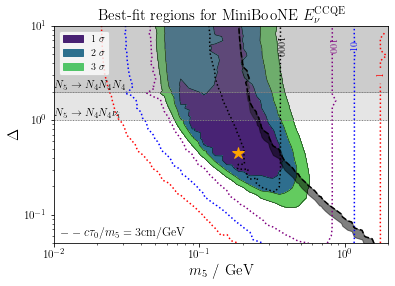

<Figure size 432x288 with 0 Axes>

In [11]:
# general features
save = True
extension = 'pdf'
leg_loc = 'upper left'

# data names and titles
path_data = path+'chi2_fit_3p2_muB.dat'
plot_path = path +f'plots/fit_3p2_general_mzprime_{mzprime}_muB_2.' + extension
data = pd.read_csv(path_data,sep='\t')

data = data[data.chi2 >= 0]

plot_title = r'Best-fit regions for MiniBooNE $E_\nu^{\mathrm{CCQE}}$'
xlabel = r'$m_5 \ / $ GeV'
ylabel = r'$\Delta$'
    
# load data for each parameter
X = data['m5'].values
Y = data['delta'].values

# line divisions for other possible channels
Y_1 = np.ones(len(Y))
Y_2 = 2 * Y_1
X_0 = np.linspace(X.min(),X.max(),500)
Y_1 = np.ones(len(X_0))
Y_2 = 2 * Y_1

# What to plot
Z = data['chi2'].values
Z -= Z.min()
dec = data['decay_length'].values / data['m5'].values

# Minimum
marker = '*'
mask = Z == Z.min()
xmin_enu, ymin_enu = X[mask][0],Y[mask][0]

# Number of events at MicroBooNE
W = data['n_muB'].values

# Colors
num_colors = 12
viridis = cm.get_cmap('viridis', num_colors)
bar_1 = mpatches.Patch(color=viridis(range(num_colors))[1], label=r'1 $\sigma$')
bar_2 = mpatches.Patch(color=viridis(range(num_colors))[4], label=r'2 $\sigma$')
bar_3 = mpatches.Patch(color=viridis(range(num_colors))[8], label=r'3 $\sigma$')
bar_4 = mpatches.Patch(color="gray", label=r'$c \tau_0 / m_5 = 1 \mathrm{cm / GeV}$')

# Plot
plt.rcParams["figure.figsize"] = (6,4)
levels = [0,2.3,6.18,11.83]
level_dif = [1.25]
plt.tricontourf(X,Y,Z,levels=levels,cmap='viridis')
plt.tricontour(X,Y,Z,levels=levels,colors='black',linewidths=0.5)

levmuB = [1,10,100,1000]
dict_lev = {1: 1, 10: 10, 100: 100, 1000:1000}
positions = [(1.8,3),(1.05,6),(0.9,6),(0.4,6)]
nmuB = plt.tricontour(X,Y,W,levels=levmuB,linewidths=1.5,linestyles='dotted', colors=['red','blue','purple','black'])
plt.clabel(nmuB, nmuB.levels,inline=True, inline_spacing=10,manual=positions, use_clabeltext=True,fmt=dict_lev, fontsize=10, colors=['red','blue','purple','black'])

# Plot ctau = 1 cm/GeV
cs = plt.tricontour(X,Y,dec,levels=[3.],colors='black',linewidths=1.5,linestyles='dashed')
a = cs.collections[0].get_paths()[0]
xline, yline = a.vertices.T
plt.fill_between(xline,0.8*yline,yline,color="black",alpha=0.5)

# Regime channels
plt.text(0.01,1.1,r'$N_5 \rightarrow N_4 N_4 \nu_i$',color='black',size=11)
plt.text(0.01,2.2,r'$N_5 \rightarrow N_4 N_4 N_4$',color='black',size=11)

# Plot minimum and regimes
plt.plot(xmin_enu,ymin_enu,color='orange',marker=marker,markersize=12)
plt.plot(X_0,Y_1,color="gray",linewidth=1,linestyle="dotted")
plt.plot(X_0,Y_2,color="gray",linewidth=1,linestyle="dotted")
plt.fill_between(X_0,1,2,color="gray",alpha=0.2)
plt.fill_between(X_0,2,Y.max(),color="gray",alpha=0.4)
plt.text(0.011,0.06,r'$--c \tau_0 / m_5 = 3 \mathrm{cm / GeV}$',color='black',size=12)


plt.legend(handles=[bar_1, bar_2, bar_3],fontsize=10,loc=leg_loc)
plt.title(plot_title,fontsize=15)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.xscale('log')
plt.yscale('log')
plt.xlim(X.min(),X.max())
plt.ylim(Y.min(),Y.max())
if save:
    plt.savefig(plot_path,dpi=400)
    plt.show()
else:
    plt.show()
plt.clf()

## Minimum

In [11]:
data = pd.read_csv(path_data,sep='\t')

In [13]:
0.001599**2

2.5568009999999996e-06

In [12]:
data[data.chi2 == data.chi2.min()]

,mzprime,m5,m4,delta,sum_w_post_smearing,v_mu5,v_54,epsilon,u_mu5/u_mu4,chi2,decay_length,N_events
375,1.25,0.186009,0.128474,0.447837,0.000858,0.001599,1.0,0.01,0.0008,6.142354,25.024069,548.529103


In [11]:
print(xmin_enu,ymin_enu)

0.1860089283676563 0.4478373872279179


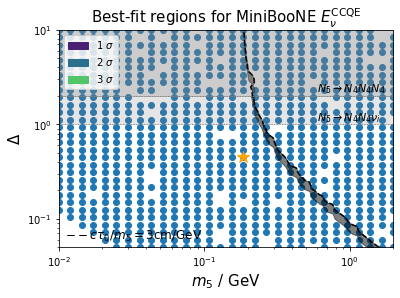

<Figure size 432x288 with 0 Axes>

In [12]:
# general features
save = False
extension = 'jpg'
leg_loc = 'upper left'

# data names and titles
path_data = path+'chi2_fit_3p2.dat'
plot_path = path +f'plots/fit_3p2_general_mzprime_{mzprime}_e_e-2.' + extension
data = pd.read_csv(path_data,sep='\t')

data = data[data.chi2 >= 0]

plot_title = r'Best-fit regions for MiniBooNE $E_\nu^{\mathrm{CCQE}}$'
xlabel = r'$m_5 \ / $ GeV'
ylabel = r'$\Delta$'
    
# load data for each parameter
X = data['m5'].values
Y = data['delta'].values

# line divisions for other possible channels
Y_1 = np.ones(len(Y))
Y_2 = 2 * Y_1
X_0 = np.linspace(X.min(),X.max(),500)
Y_1 = np.ones(len(X_0))
Y_2 = 2 * Y_1

# What to plot
Z = data['chi2'].values
Z -= Z.min()
dec = data['decay_length'].values / data['m5'].values

# Minimum
marker = '*'
mask = Z == Z.min()
xmin_enu, ymin_enu = X[mask][0],Y[mask][0]

# Colors
num_colors = 12
viridis = cm.get_cmap('viridis', num_colors)
bar_1 = mpatches.Patch(color=viridis(range(num_colors))[1], label=r'1 $\sigma$')
bar_2 = mpatches.Patch(color=viridis(range(num_colors))[4], label=r'2 $\sigma$')
bar_3 = mpatches.Patch(color=viridis(range(num_colors))[8], label=r'3 $\sigma$')
bar_4 = mpatches.Patch(color="gray", label=r'$c \tau_0 / m_5 = 1 \mathrm{cm / GeV}$')

# Plot
plt.rcParams["figure.figsize"] = (6,4)
levels = [0,2.3,6.18,11.83]
level_dif = [1.25]
#plt.tricontourf(X,Y,Z,levels=levels,cmap='viridis')
#plt.tricontour(X,Y,Z,levels=levels,colors='black',linewidths=0.5)
plt.scatter(X,Y)

# Plot ctau = 1 cm/GeV
cs = plt.tricontour(X,Y,dec,levels=[3.],colors='black',linewidths=1.5,linestyles='dashed')
a = cs.collections[0].get_paths()[0]
xline, yline = a.vertices.T
plt.fill_between(xline,0.8*yline,yline,color="black",alpha=0.5)

# Regime channels
plt.text(0.6,1.1,r'$N_5 \rightarrow N_4 N_4 \nu_i$',color='black',size=11)
plt.text(0.6,2.2,r'$N_5 \rightarrow N_4 N_4 N_4$',color='black',size=11)

# Plot minimum and regimes
plt.plot(xmin_enu,ymin_enu,color='orange',marker=marker,markersize=12)
plt.plot(X_0,Y_1,color="gray",linewidth=1,linestyle="dotted")
plt.plot(X_0,Y_2,color="gray",linewidth=1,linestyle="dotted")
plt.fill_between(X_0,1,2,color="gray",alpha=0.2)
plt.fill_between(X_0,2,Y.max(),color="gray",alpha=0.4)
plt.text(0.011,0.06,r'$--c \tau_0 / m_5 = 3 \mathrm{cm / GeV}$',color='black',size=12)


plt.legend(handles=[bar_1, bar_2, bar_3],fontsize=10,loc=leg_loc)
plt.title(plot_title,fontsize=15)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.xscale('log')
plt.yscale('log')
plt.xlim(X.min(),X.max())
plt.ylim(Y.min(),Y.max())
if save:
    plt.savefig(plot_path,dpi=400)
    plt.show()
else:
    plt.show()
plt.clf()

In [23]:
m5

array([0.01   , 0.012  , 0.01441, 0.0173 , 0.02077, 0.02493, 0.02993,
       0.03593, 0.04313, 0.05177, 0.06215, 0.07461, 0.08957, 0.1075 ,
       0.1291 , 0.1549 , 0.186  , 0.2233 , 0.2681 , 0.3218 , 0.3863 ,
       0.4637 , 0.5567 , 0.6683 , 0.8022 , 0.963  , 1.156  , 1.388  ,
       1.666  , 2.     ])

In [31]:
np.sort(data['m5'].unique())

array([0.01      , 0.01200455, 0.0249304 , 0.02992783, 0.03592701,
       0.04312875, 0.10752172, 0.12907498, 0.1549487 , 0.18600893,
       0.22329534, 0.26805599, 0.32178914, 0.38629336, 0.46372777,
       0.55668429, 0.6682744 , 0.7       , 0.99328839, 1.40945975,
       2.        ])

In [28]:
len(np.sort(data['delta'].unique()))

30

In [29]:
len(data)

991